In [ ]:
!pip install network matplotlib

In [ ]:
import network
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    import heapq

    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

In [ ]:
def get_path(previous, end):
    path = []
    while end is not None:
        path.insert(0, end)
        end = previous[end]
    return path

In [ ]:
def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight shortest path
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()

jarak dari A ke Z: 14
Jalur: A->B->D->E->Z


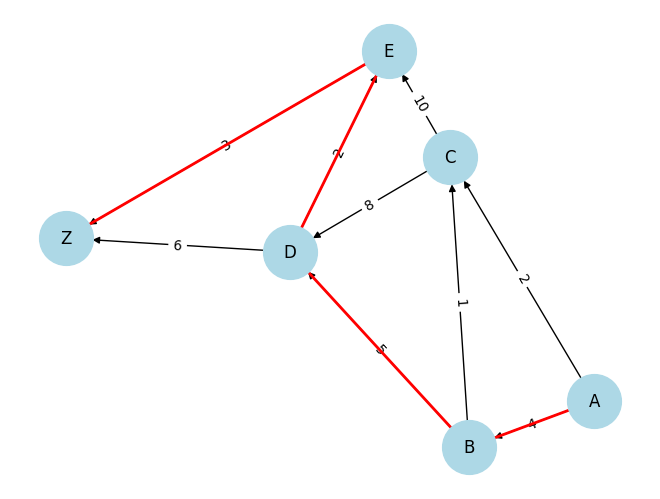

In [ ]:
# Definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

#Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

#Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {'->'.join(shortest_path)}")

#Visualisasi
visualize_graph(graph, path=shortest_path)